<a href="https://colab.research.google.com/github/udbhavpangotra/Tesla-vs-Exxon/blob/main/Tesla%20and%20Exxon%20Mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=f8c7ce5eb3499cb92ee0f4a914fc3bc0518bd49fb853594a0e8c019392fd4f18
  Stored in directory: /tmp/pip-ephem-wheel-cache-jkwxx_ne/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import yfinance as yf
# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.color_palette("mako", as_cmap=True)
sns.color_palette("flare", as_cmap=True)
# sns.color_palette("Blues", as_cmap=True)
sns.color_palette("rocket_r", as_cmap=True)
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [4]:
# Import for datareading:
import pandas_datareader as web
from pandas_datareader import data, wb
import datetime

In [5]:
companies = ['TSLA','XOM']

In [6]:
data_1 = pdr.get_data_yahoo(companies[0], start="2017-01-01", end="2021-08-30")

[*********************100%***********************]  1 of 1 completed


In [29]:
data_1.head(1)

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2017-01-03,42.972,44.066002,42.192001,43.397999,43.397999,29616500,TSLA


In [9]:
data_2 = pdr.get_data_yahoo(companies[1], start = "2017-01-01", end="2021-08-30")

[*********************100%***********************]  1 of 1 completed


In [28]:
data_2.head(1)

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2017-01-03,90.940002,91.339996,90.150002,90.889999,70.933411,10360600,XOM


In [11]:
data_1["Stock Name"] = "TSLA"
data_2["Stock Name"] = "XOM"
TSLA = data_1
XOM = data_2

df = pd.concat([XOM,TSLA])

In [12]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2017-01-03,90.940002,91.339996,90.150002,90.889999,70.933411,10360600,XOM


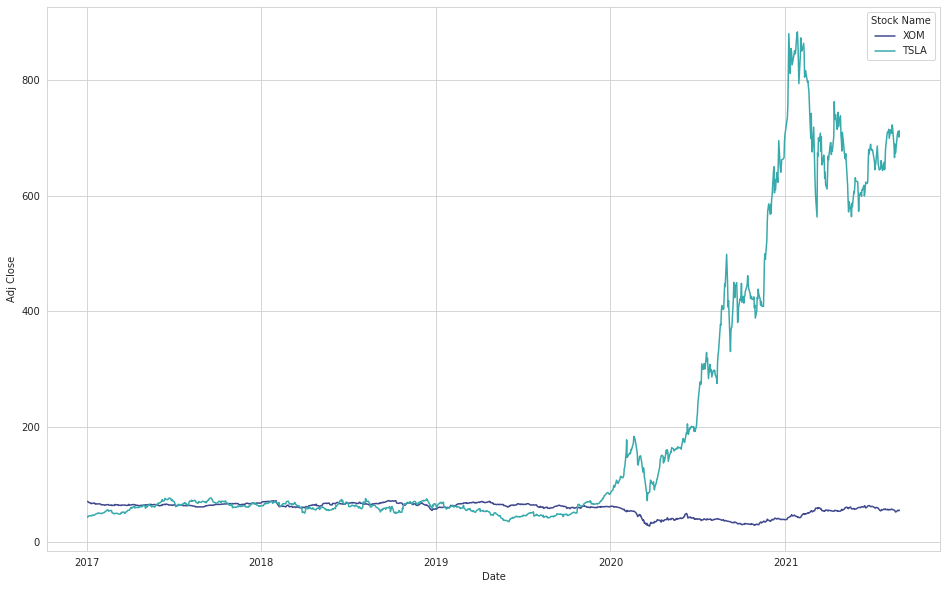

In [13]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="Date" ,y="Adj Close", hue = "Stock Name",palette="mako")

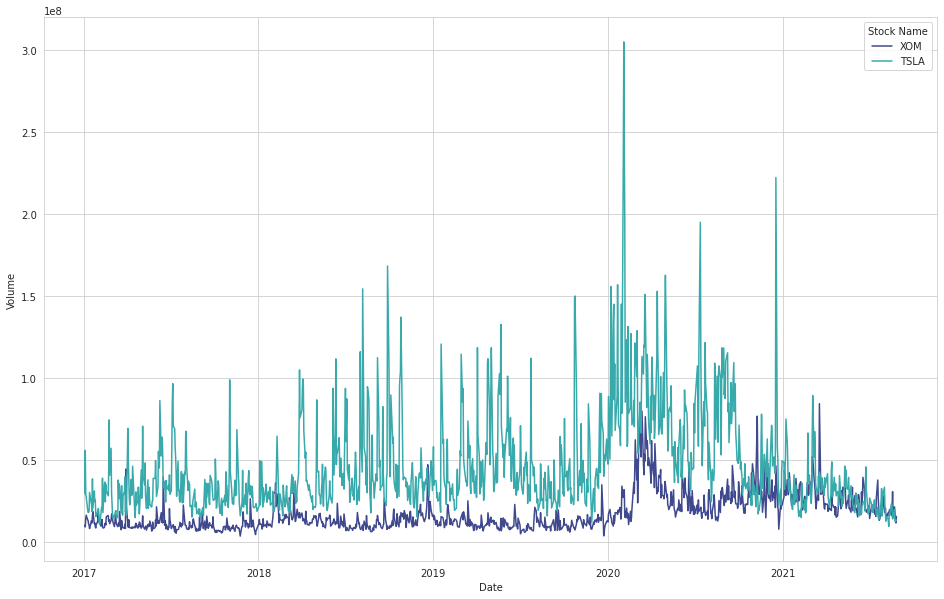

In [14]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="Date" ,y="Volume", hue = "Stock Name",palette="mako")

In [15]:
# Plots historical closing price, and moving averages of closing price for 10, 20, 50 days:
# Moving average for 10, 20 and 50 days:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    df[column_name]=df['Adj Close'].rolling(window=ma).mean()

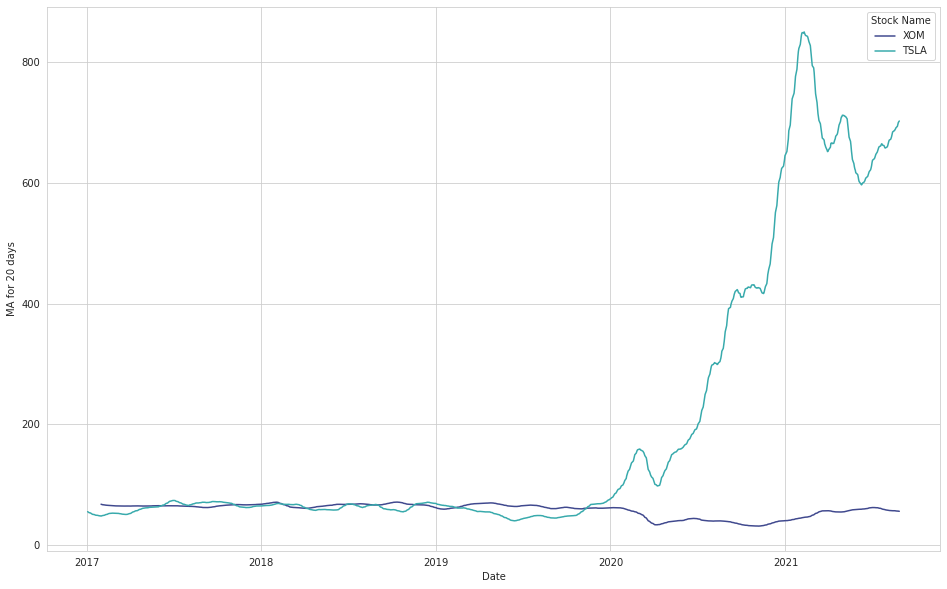

In [16]:
plt.figure(figsize=(16, 10))

sns.lineplot(data=df, x="Date" ,y="MA for 20 days", hue = "Stock Name",palette="mako")

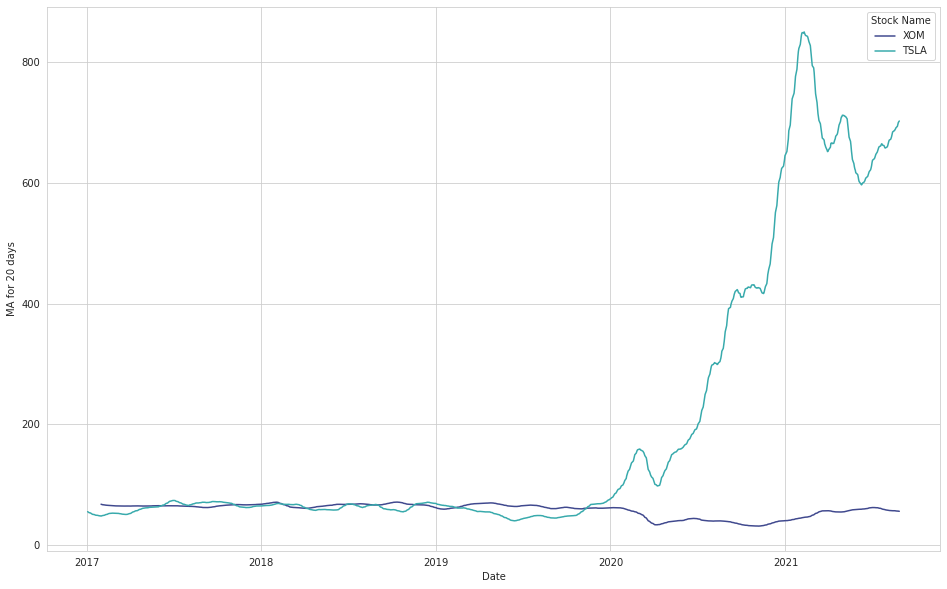

In [17]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="Date" ,y="MA for 20 days", hue = "Stock Name",palette="mako")

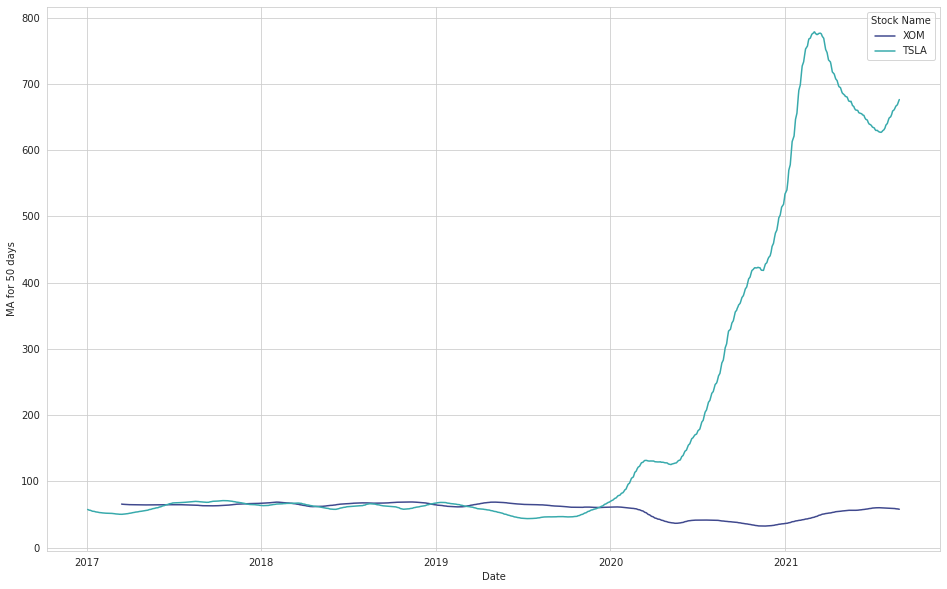

In [18]:

plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="Date" ,y="MA for 50 days", hue = "Stock Name",palette="mako")


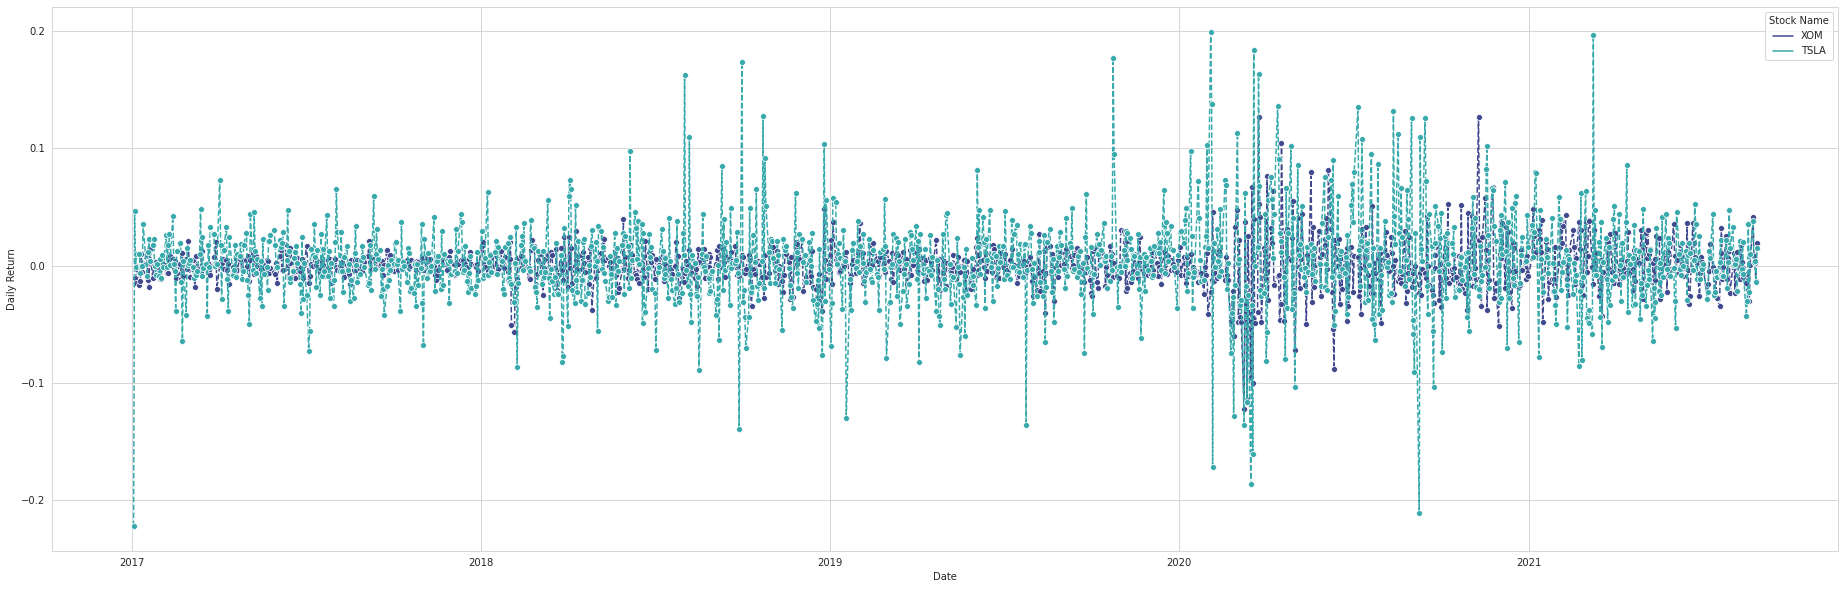

In [19]:
# Plots daily return for one year period: 
df['Daily Return'] = df['Adj Close'].pct_change()
plt.figure(figsize = (32,10))
sns.lineplot(data = df, x= "Date", y='Daily Return',hue = "Stock Name", legend = True, linestyle = '--', marker = 'o', palette = "mako")

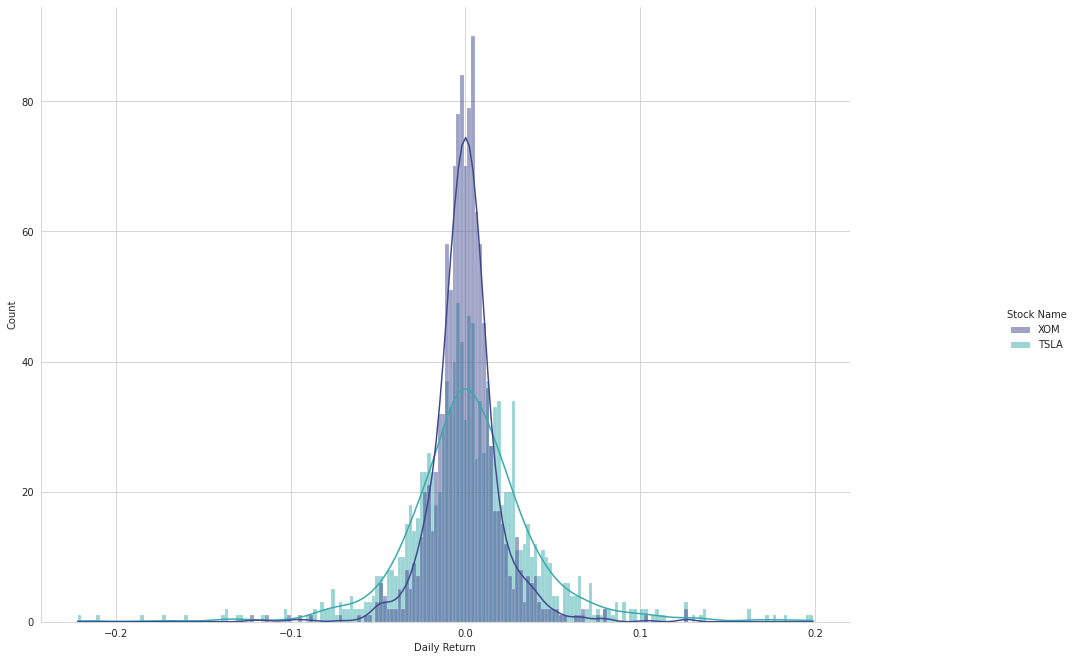

In [20]:
# plt.figure(figsize = (16,10))
g= sns.displot(df,x='Daily Return', bins = 200,kde=True,palette="mako",hue="Stock Name")
g.fig.set_size_inches(16,10)

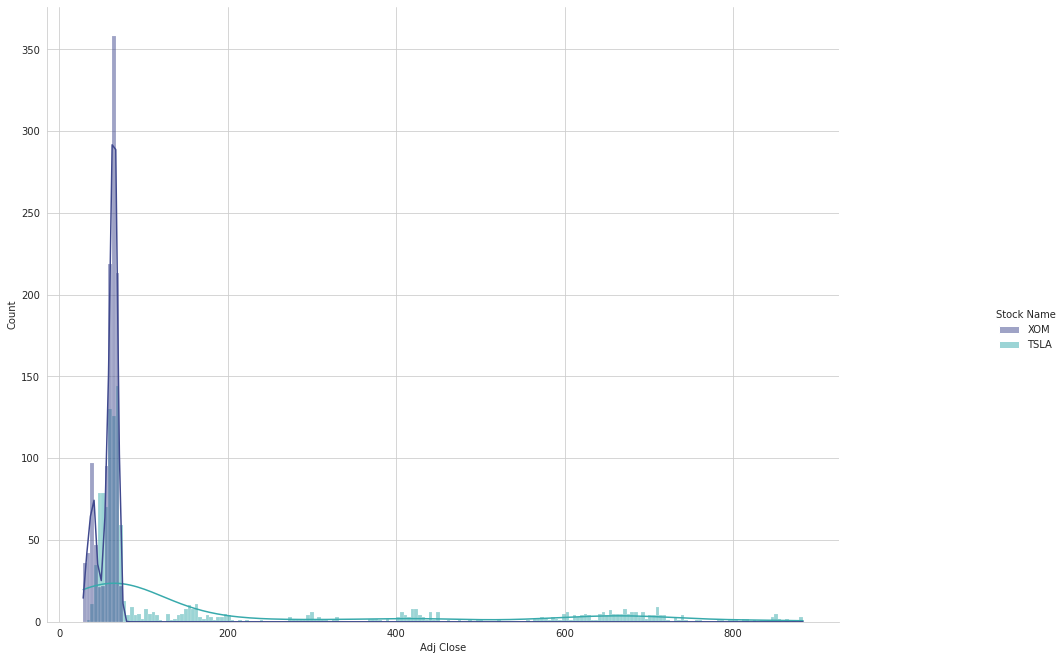

In [21]:
g = sns.displot(df,x='Adj Close', bins = 200,kde=True,palette="mako",hue="Stock Name")
g.fig.set_size_inches(16,10)

In [22]:
companies

['TSLA', 'XOM']

In [23]:
data_new = pdr.get_data_yahoo(companies, start="2017-01-01", end="2021-08-30")["Adj Close"]

[*********************100%***********************]  2 of 2 completed


In [27]:
data_new.head(1)

,TSLA,XOM
Date,,
2017-01-03,43.397999,70.933411


In [25]:
companies_rets = data_new.pct_change()

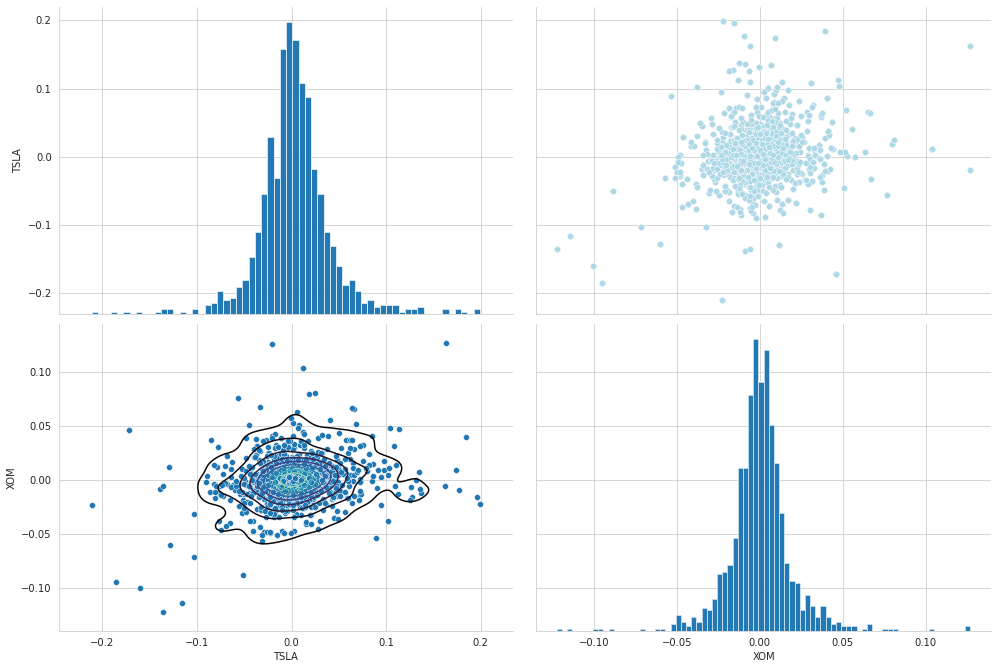

In [68]:
g= sns.pairplot(data = companies_rets,dropna = True)
g.fig.set_size_inches(16,10)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot, color='lightblue')
g.map_lower(sns.kdeplot,cmap='mako')
g.map_diag(sns.histplot)

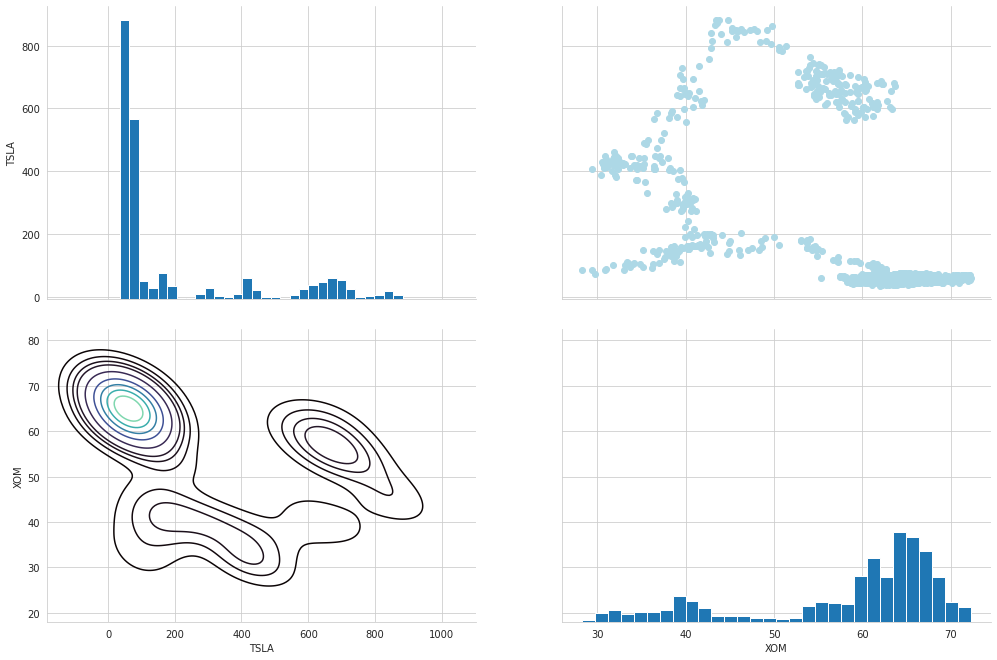

In [61]:
returns_fig = sns.PairGrid(data_new.dropna())
returns_fig.fig.set_size_inches(16,10)
returns_fig.map_upper(plt.scatter, color = 'lightblue')
returns_fig.map_lower(sns.kdeplot, cmap = 'mako')
returns_fig.map_diag(plt.hist, bins = 30)

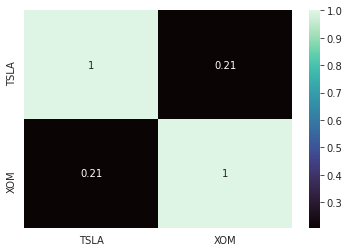

In [47]:
  sns.heatmap(companies_rets.dropna().corr(), annot = True, cmap='mako')

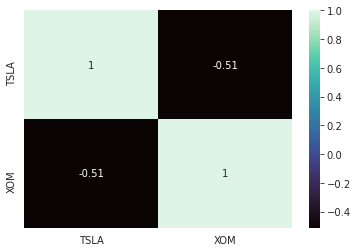

In [49]:
sns.heatmap(data_new.dropna().corr(), annot = True, cmap='mako')

**Risk Analysis**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.¶

In [51]:
rets = companies_rets.dropna()

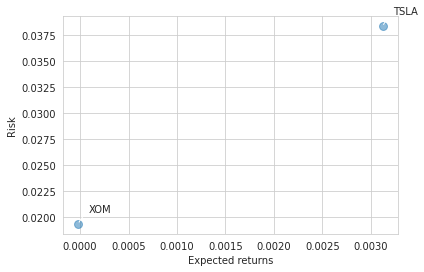

In [57]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, check the following line:
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 10),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = 0.3'))

Value at risk using the "bootstrap" method


TESLA:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


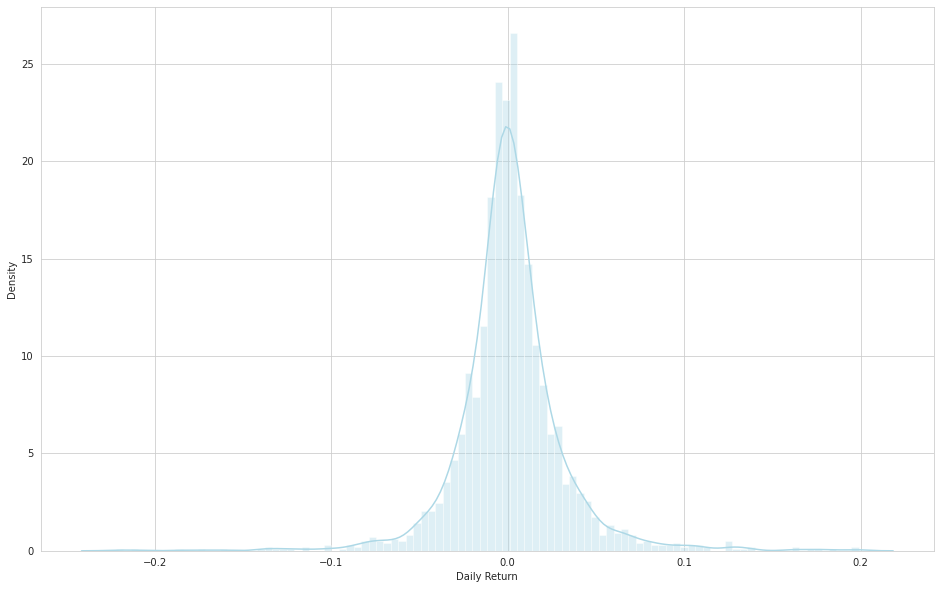

In [69]:
# Daily return histogram for TESLA stock: 
# using dropna() here, because NaN values can't be read by seaborn
plt.figure(figsize=(16,10))
sns.distplot(df['Daily Return'].dropna(),bins=100,color='lightblue')

In [70]:
# The 0.05 empirical quantile of daily returns
rets['TSLA'].quantile(0.05)

-0.05029597224830007

The 0.05 empirical quantile of daily returns is at -0.05039. 

That means that with 95% confidence, our worst daily loss will not exceed 5.04%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.05039... * 1,000,000 = 50,392 USD

Value at Risk using the Monte Carlo method

In [71]:
# TESLA:

# Set up our time horizon
days = 365*5

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for TESLA
mu = rets.mean()['TSLA']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['TSLA']

In [72]:
# Define the following fuction:

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [73]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,TSLA
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,TSLA
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,TSLA
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,TSLA
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,TSLA


Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

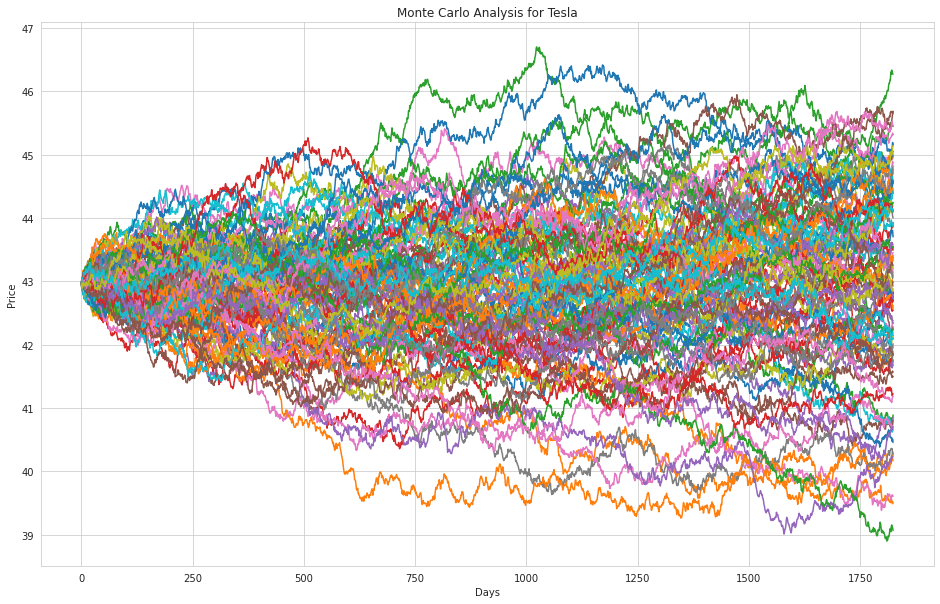

In [76]:
# Get start price from TSLA.head()
start_price = 42.972000
plt.figure(figsize=(16,10))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))


plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

In [78]:
# Set the array for our simulation:

# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Tesla Stock after 1825 days')

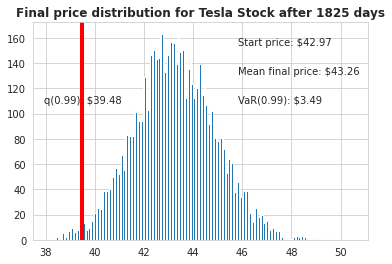

In [79]:
# Plot a histogram and use quartile to define the risk for this stock:

# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold')

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Tesla stock, which looks to be 3.49 USD for every investment of 43.26 USD.

This basically means that for every initial stock you purchase your are putting about 3.49 USD at risk 99% of the time.

In [80]:
# EXXON 

# Now let's grab our mu (drift) from the expected return data we got for Exxon Mobile Corporation
mu = rets.mean()['XOM']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['XOM']

In [83]:
XOM.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2017-01-03,90.940002,91.339996,90.150002,90.889999,70.933411,10360600,XOM
2017-01-04,91.120003,91.150002,89.750000,89.889999,70.152969,9434200,XOM
2017-01-05,90.190002,90.300003,88.440002,88.550003,69.107208,14443200,XOM
2017-01-06,88.790001,88.980003,87.820000,88.500000,69.068169,16518100,XOM
2017-01-09,88.220001,88.220001,86.550003,87.040001,67.928757,13762300,XOM


Text(0.5, 1.0, 'Monte Carlo Analysis for Exxon')

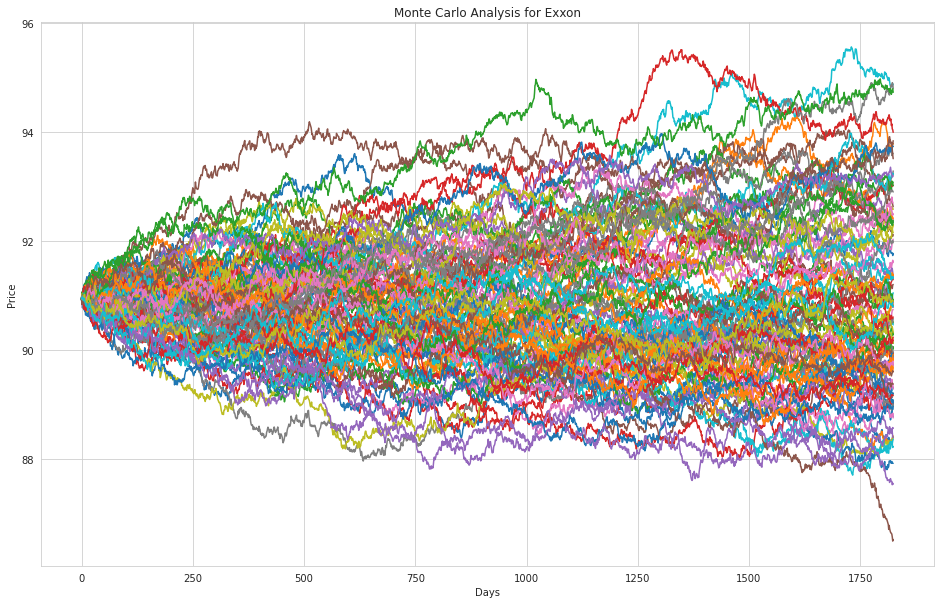

In [84]:
# Get start price from XOM.head()
start_price = 90.94
plt.figure(figsize=(16,10))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Exxon')

Text(0.5, 1.0, 'Final price distribution for Exxon Stock after 1825 days')

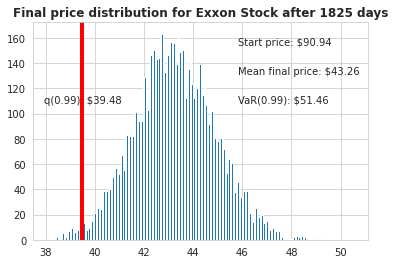

In [85]:
# Now we will define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Exxon Stock after %s days" % days, weight='bold')

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Exxom stock, which looks to be 51.46 USD for every investment of 90.94 USD.



This basically means that for every initial stock you purchase your are putting about 51.46 USD at risk 99% of the time.

In [86]:
# Basically less risk in terms of value for Tesla :P